### Import modules

In [1]:
import networkx as nx
from utils import return_graph,draw_graph
from core import train_agent

import numpy as np
from functools import partial
from time import time

import pickle as pkl

from matplotlib import pyplot as plt
import seaborn as sns

import random

%load_ext autoreload
%autoreload 2

SEED = 181731

In [2]:
def plotRegrets(line_regret,labels = None,linestyles = None,colors = None, titles=None, save_fig=None):
    """
    agents: A list of dictionaries. Each dictionary contains the configuration of a run and the corresponding regret.
    """
    sns.set()
    
    plt.style.use('seaborn-whitegrid')
    plt.rc('font',weight='bold')
    for name,regret in line_regret.items():
        regret = np.cumsum(regret, axis=1)
        regret = np.mean(regret, axis=0)
        sd = np.std(regret,axis=0)

        
        # plt.plot([i for i in range(1,len(regret)+1)],regret, label=label,\
                # linewidth=3)
            
        plot_every = int(len(regret)/7)
        if not labels is None:
            label = labels[name]
        else:
            label = name
            
        if not linestyles is None:
            ls = linestyles[name]
        else:
            ls = 'solid'
        
        if not colors is None:
            c = colors[name]
        else:
            c = None
            
        plt.errorbar(range(1,len(regret)+1), regret ,sd,errorevery=(plot_every,plot_every),\
                     label=label,ls = ls,color=c ,linewidth=4,\
                    capsize=5,elinewidth=3)
            
    if titles is not None:    
        plt.title(titles[0])
    
    fs = 30
    # plt.legend(fontsize=20)        
    plt.gca().ticklabel_format(scilimits=(0,2),useMathText=True) # No decimal places
    
    plt.xlabel('$t$', fontsize=fs)
    plt.ylabel('Regret', fontsize=fs)
    plt.gca().yaxis.get_offset_text().set_fontsize(fs)
    plt.gca().xaxis.get_offset_text().set_fontsize(fs)
    plt.tick_params(labelsize=fs)
    if not (save_fig is None):
        plt.savefig('Figures/'+save_fig, bbox_inches = 'tight')
    plt.show()

# Load Data

In [3]:
graph_types = ['line','circle','tree','grid','star','fully_connected']
# T = 20000
T = 20000
n_nodes = 100

algs = ['G-UCB','UCRL2']
regrets = {}
for graph in graph_types:
    with open('Data/{}_vsUCRL2.pkl'.format(graph), 'rb') as file:
        regrets[graph] = pkl.load(file)

# The effect of UCB

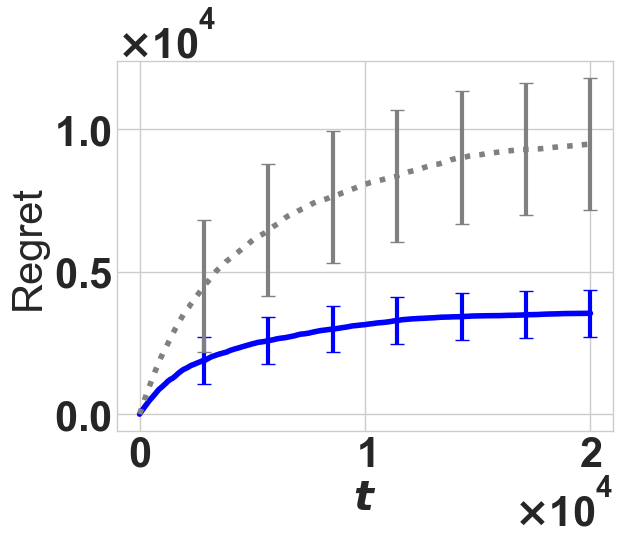

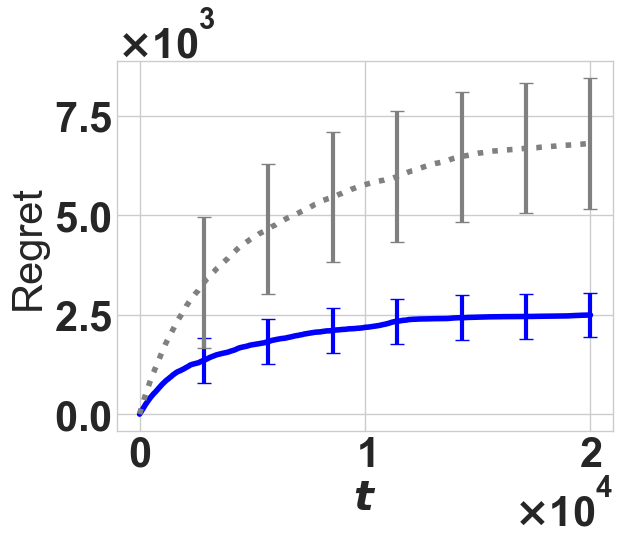

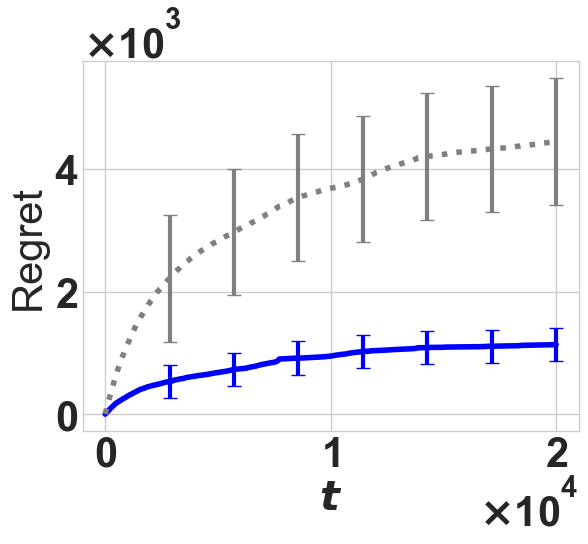

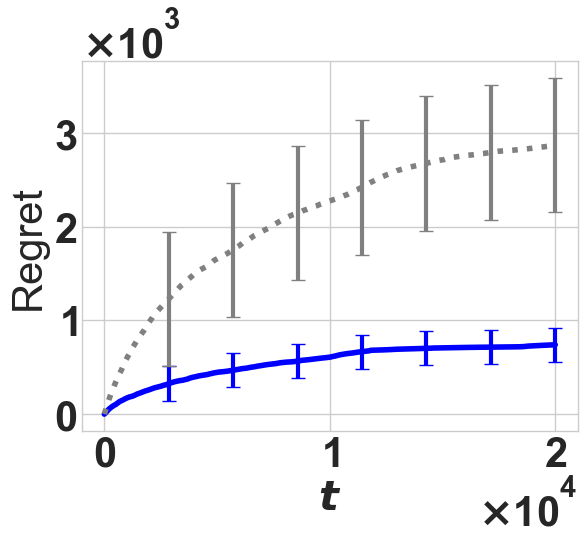

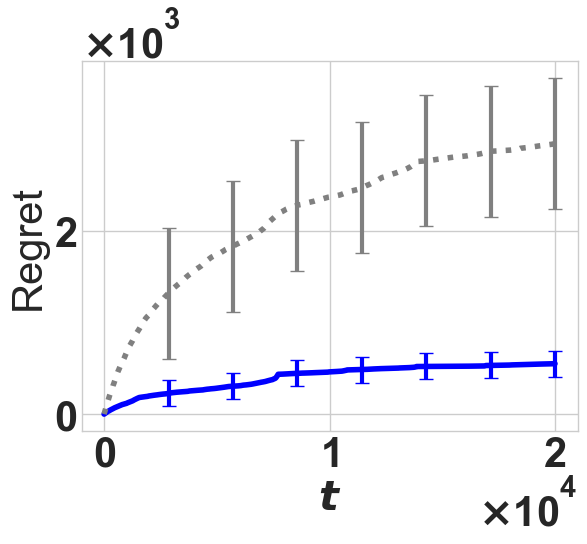

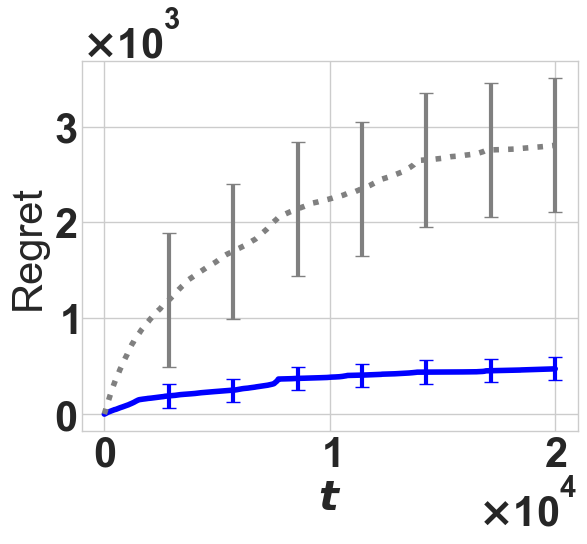

In [4]:
profiles = ["{}-{}".format(alg, 'G-UCB') for alg in algs]
labels = {"{}-{}".format(alg, 'G-UCB'):'UCB from\n {}'.format(alg) for alg in algs}
linesyles = {"{}-{}".format(alg, 'G-UCB'):ls for alg,ls in zip(algs,['solid','dotted'])}

colors = {"{}-{}".format(alg, 'G-UCB'):color for alg,color in zip(algs,['blue','gray'])}
for graph in graph_types:
    plt.figure(dpi=100)
    save_fig = 'UCBEffect/{}_UCBeffect.png'.format(graph)
    plotRegrets({name:regrets[graph][name] for name in profiles},labels,linesyles,colors,save_fig=save_fig)


# The effect of doubling scheme

## Assume the UCB is from G-UCB, see what is the effect of doubling episode

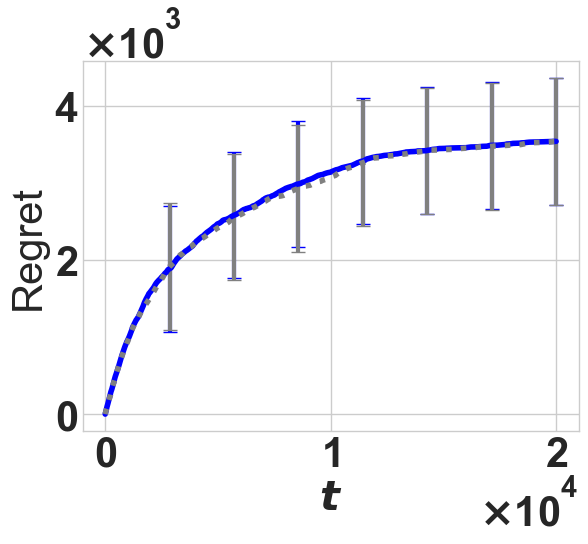

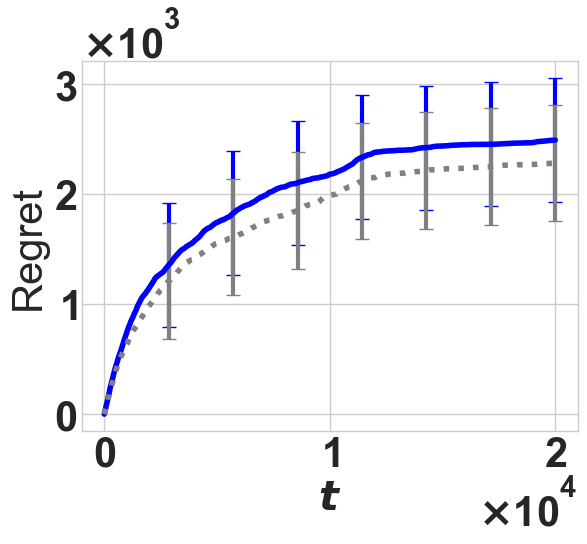

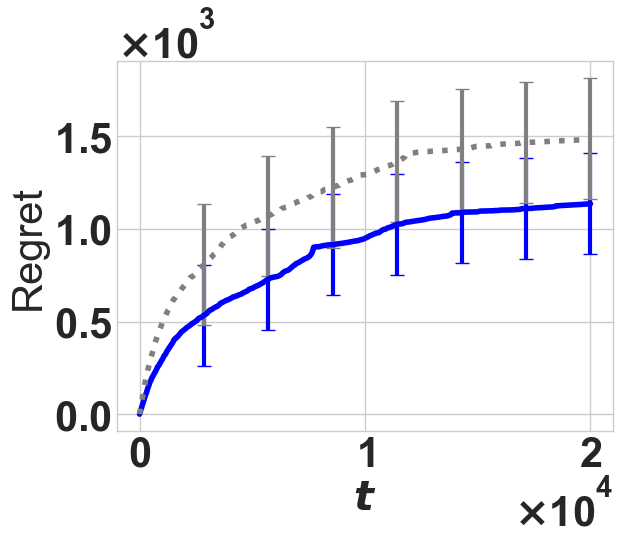

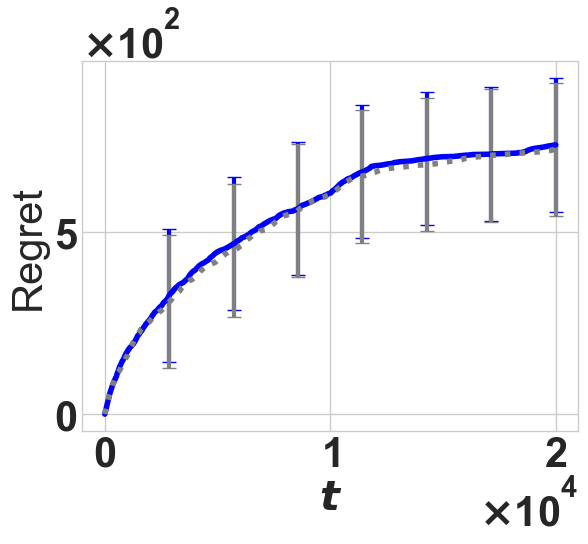

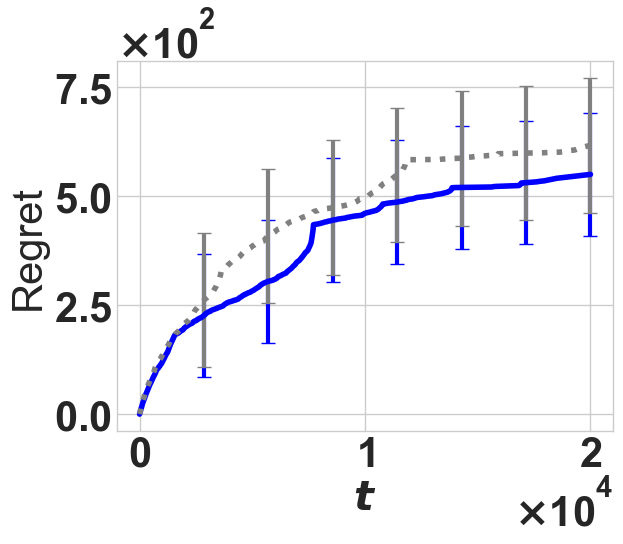

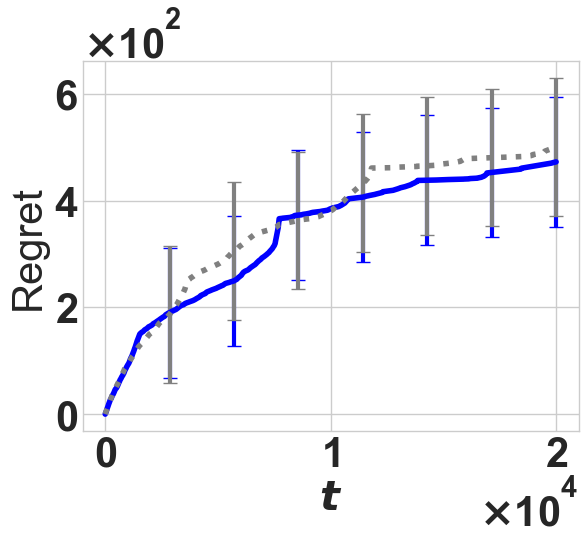

In [5]:
profiles = ["{}-{}".format('G-UCB',alg) for alg in algs]
labels = {"{}-{}".format('G-UCB',alg):'Doubling from\n {}'.format(alg) for alg in algs}
linesyles = {"{}-{}".format('G-UCB',alg):ls for alg,ls in zip(algs,['solid','dotted'])}

colors = {"{}-{}".format('G-UCB',alg):color for alg,color in zip(algs,['blue','gray'])}
for graph in graph_types:
    plt.figure(dpi=100)
    save_fig = 'DoublingEffect/{}_DoublingEffect.png'.format(graph)
    plotRegrets({name:regrets[graph][name] for name in profiles},labels,linesyles,colors,save_fig=save_fig)


## Assume the UCB is from UCRL2, see what is the effect of doubling episode

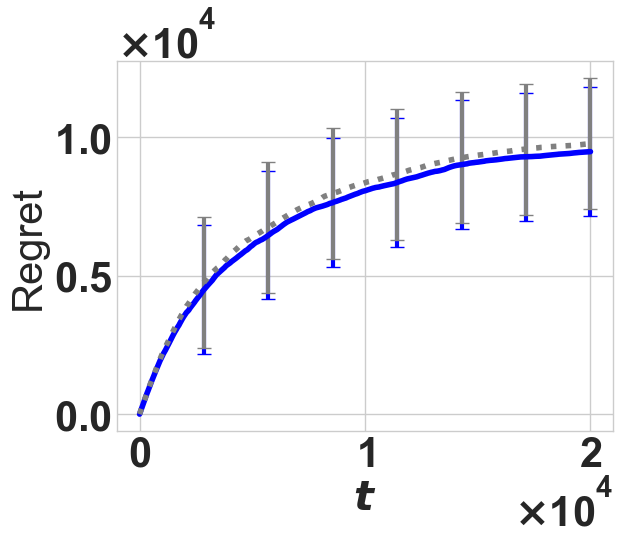

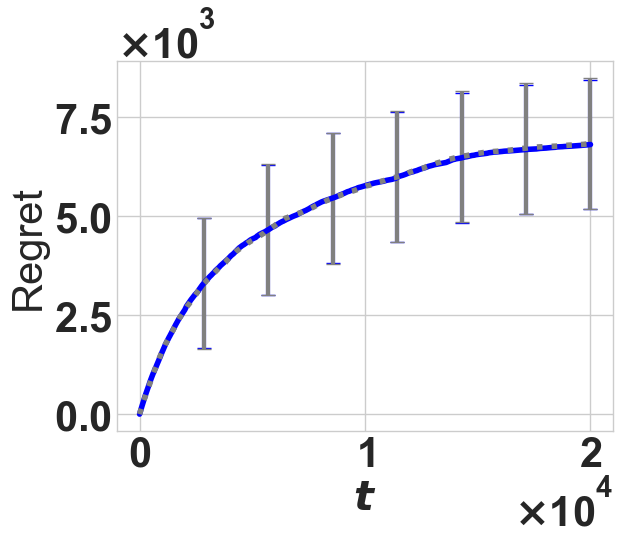

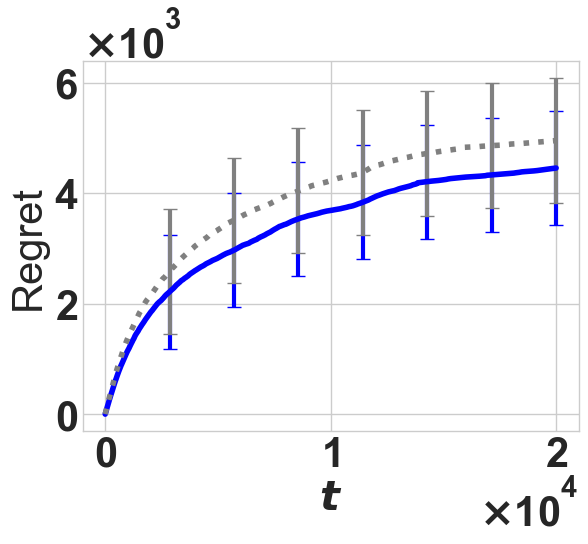

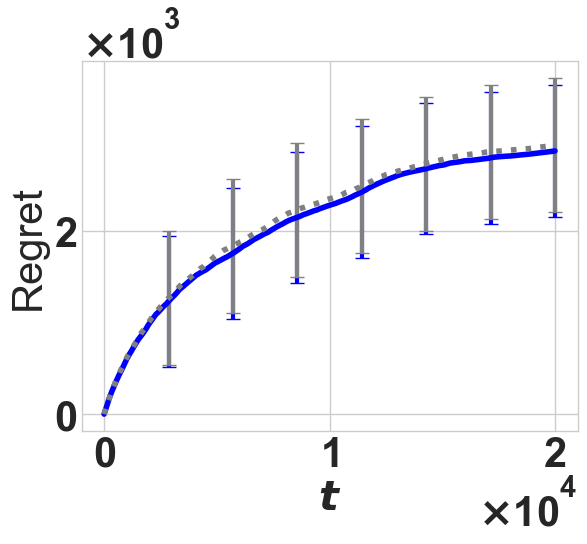

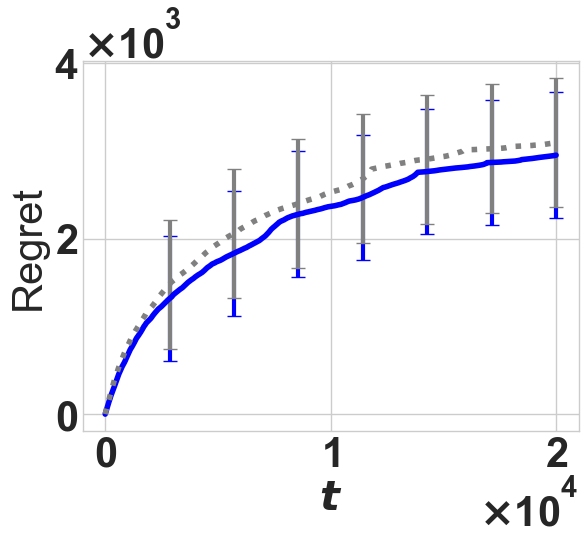

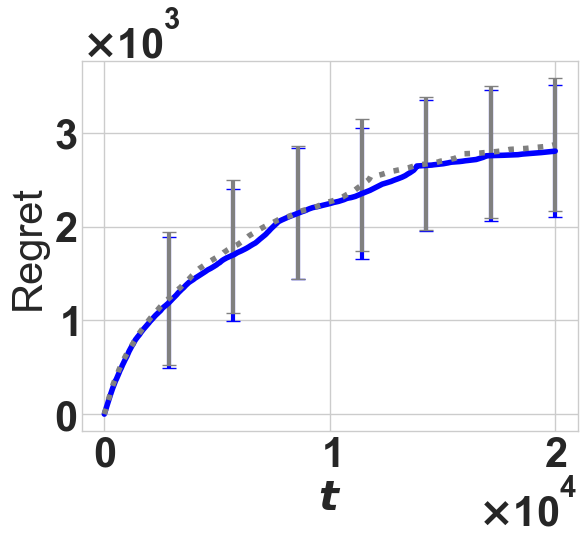

In [13]:
profiles = ["{}-{}".format('UCRL2',alg) for alg in algs]
labels = {"{}-{}".format('UCRL2',alg):'Doubling from\n {}'.format(alg) for alg in algs}
linesyles = {"{}-{}".format('UCRL2',alg):ls for alg,ls in zip(algs,['solid','dotted'])}

colors = {"{}-{}".format('UCRL2',alg):color for alg,color in zip(algs,['blue','gray'])}
for graph in graph_types:
    plt.figure(dpi=100)
    plotRegrets({name:regrets[graph][name] for name in profiles},labels,linesyles,colors)
